### <p style="text-align: center;">Tu będą wykonywane modele stan XD</p>

In [10]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import mstats

import pandas as pd
import numpy as np
from os.path import join as JoinPath
from enum import Enum
from typing import List
from copy import deepcopy

In [11]:
electricity_household = pd.read_csv('electricity_household' + '.tsv',
                                    sep='\t',header=0,)
mean_list = list(electricity_household.mean())

C:\Users\Jasio\AppData\Local\Temp/ipykernel_18960/2693346157.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_list = list(electricity_household.mean())


In [12]:
x = list(range(len(mean_list)))

In [13]:
model_1_fit=CmdStanModel(stan_file=JoinPath('stan-files', 'model_1.stan'))
fit_result = model_1_fit.sample(data=dict(
    N=len(mean_list),
    x=x,
    y=mean_list
), seed=2137)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)




chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [14]:
fit_result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,230.0000,0.036000,1.20000,230.000,230.0000,230.0000,1100.0,630.0,1.0
alpha,0.1200,0.000130,0.00460,0.120,0.1200,0.1300,1300.0,730.0,1.0
beta,0.0012,0.000003,0.00012,0.001,0.0012,0.0014,1500.0,890.0,1.0
sigma,0.0200,0.000051,0.00170,0.017,0.0200,0.0230,1200.0,670.0,1.0
y_sim[1],0.1200,0.000340,0.02000,0.092,0.1200,0.1600,3571.0,2081.0,1.0
...,...,...,...,...,...,...,...,...,...
y_sim[64],0.2000,0.000330,0.02000,0.170,0.2000,0.2300,3558.0,2074.0,1.0
y_sim[65],0.2000,0.000320,0.02000,0.170,0.2000,0.2400,4012.0,2338.0,1.0
y_sim[66],0.2000,0.000330,0.02000,0.170,0.2000,0.2400,3759.0,2191.0,1.0


In [15]:
alpha = np.mean(fit_result.stan_variable("alpha"))
beta = np.mean(fit_result.stan_variable("beta"))
sigma = np.mean(fit_result.stan_variable("sigma"))
y_sim_to_mean = fit_result.stan_variable("y_sim")

In [16]:
y_sim = []
for i in range(len(x)):
    y_sim.append(y_sim_to_mean[2,i])

In [17]:
upper_dev = [alpha + beta * x_ + sigma for x_ in x]
lower_dev = [alpha + beta * x_ - sigma for x_ in x]
dev = [alpha + beta * x_ for x_ in x]

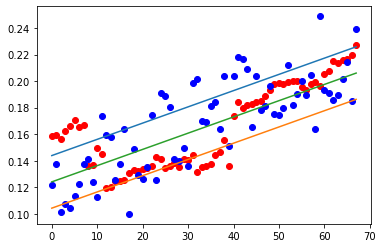

In [18]:
plt.plot(x, mean_list, "ro")
plt.plot(x, y_sim, "bo")
plt.plot(x, upper_dev)
plt.plot(x, lower_dev)
plt.plot(x, dev)
plt.show()